# ***Monthly Expenses Analysis Report***

---

## **Introduction**

Tracking your Monthly expenses is the habit we all have been taught as kids, but I personally never properly adopted it. I have always thought of tracking my expenses but failed many times. Now that I am pursuing my master’s in data science, I have learned how to create data sets and a few ways to represent any data analytically and understand the data with the help of patterns and trends.

---

##**Objective of the Analysis**

The basic objective of this project is to understand my spending habits and track down unnecessary spending. For that I have drafted a few questions that can help me understand my overall monthly expenses.

### Let's import all the required Libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

## **Dataset Description**

The Data set consists of 3 months of all my transactions Rent, Gym membership, insurance, etc. The Data set has a total of 12 columns, it consists of integers, objects and floats. It was created for tracking all my transactions with the maximum amount of information in it.

Importing the data set first with the pandas and then see what we have got in it.

In [2]:
df = pd.read_csv("/content/Monthly expenses Dataset - Sheet2 (1).csv")

In [3]:
df.head()

,Date,Reason,Split,Common,My amount,Total,MFA,Unnecessary,MERC,Paid by Harsh,Grocery,ASW
0,3/29/2025,Edeka,0.00,0.00,11.19,11.19,0,11.19,0,1,0,Harsh
1,3/29/2025,Rewe,0.00,5.07,0.99,6.06,0,0.00,0,1,1,Ritesh
2,3/29/2025,Kaufland,0.99,0.00,13.72,14.71,0,0.79,0,1,1,Ritesh
3,3/29/2025,Gifts,41.50,13.39,25.00,79.89,0,0.00,1,1,0,Harsh
4,3/29/2025,Rewe,20.23,14.34,0.00,39.42,0,0.00,1,1,0,Nikhil_Dipanshu


In [4]:
df.columns

Index(['Date', 'Reason', 'Split', 'Common', 'My amount', 'Total', 'MFA',
       'Unnecessary', 'MERC', 'Paid by Harsh', 'Grocery', 'ASW'],
      dtype='object')

### Here's the genral Idea of the columns in the data set.
1.	Let’s see the structure of the data set.
2.	Date: This column consists of transactions date
3.	Reason: The column has multiple categorical values to show the purpose of the expense.
4.	Split: This column has records of the amount that I share with others.
5.	Common: This column has records of the amount that I have paid in common with someone.
6.	My amount: As the name suggests this column has records of my spendings
7.	Total: The total amount of the transaction.
8.	MFA: Monthly Fix Amount.
9.	Unnecessary: The amount that was spent unnecessarily in the transaction.
10.	MERC: Monthly Extra Required Cost.
11.	Paid by Harsh: It shows whether I paid the expense cost or not.
12.	Grocery: Cost of grocery in the transaction.
13.	ASW: Amount Shared With.


 Now that we have imported the data set and understood the columns in it, we can use different functions to get more insights from the data.

In [5]:
df.shape

(130, 12)

In [6]:
df.describe()

,Split,Common,My amount,Total,MFA,Unnecessary,MERC,Paid by Harsh,Grocery
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,1.527077,2.934923,21.730769,26.457692,0.092308,2.376923,0.153846,0.884615,0.407692
std,4.441534,5.908391,77.958793,77.471986,0.290580,3.552868,0.362197,0.320721,0.493306
min,0.000000,0.000000,0.000000,0.790000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.657500,4.015000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,4.210000,9.215000,0.000000,0.790000,0.000000,1.000000,0.000000
75%,0.972500,3.930000,8.685000,15.712500,0.000000,3.705000,0.000000,1.000000,1.000000
max,41.500000,36.410000,466.000000,466.000000,1.000000,20.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

,0
Date,0
Reason,0
Split,0
Common,0
My amount,0
Total,0
MFA,0
Unnecessary,0
MERC,0
Paid by Harsh,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

,0
Date,object
Reason,object
Split,float64
Common,float64
My amount,float64
Total,float64
MFA,int64
Unnecessary,float64
MERC,int64
Paid by Harsh,int64


---

## **Data Cleaning & Preprocessing**

Points to note from the Last section are,

1. There are no Null values and no duplicate values in data set.
2. We have also got the data types of all columns.
3. The “Date” column needs to be changed into datetime format for time-based analysis.
4. As you can see there are multiple categorical columns which needs to be one hot encoded.




In [10]:
df['Date'] = pd.to_datetime(df['Date'])
start_date = '2025-01-01'
end_date = '2025-03-31'

In [11]:
df_encoded = pd.get_dummies(df, columns=['Reason', 'ASW'])
print(df_encoded.head())

        Date  Split  Common  My amount  Total  MFA  Unnecessary  MERC  \
0 2025-03-29   0.00    0.00      11.19  11.19    0        11.19     0   
1 2025-03-29   0.00    5.07       0.99   6.06    0         0.00     0   
2 2025-03-29   0.99    0.00      13.72  14.71    0         0.79     0   
3 2025-03-29  41.50   13.39      25.00  79.89    0         0.00     1   
4 2025-03-29  20.23   14.34       0.00  39.42    0         0.00     1   

   Paid by Harsh  Grocery  ...  Reason_Woolworth  ASW_Agin  ASW_Bhargav  \
0              1        0  ...             False     False        False   
1              1        1  ...             False     False        False   
2              1        1  ...             False     False        False   
3              1        0  ...             False     False        False   
4              1        0  ...             False     False        False   

   ASW_Dipanshu  ASW_Harsh  ASW_Nikhil  ASW_Nikhil_Dhrov_yatin  \
0         False       True       False      

In [12]:
df_encoded.columns

Index(['Date', 'Split', 'Common', 'My amount', 'Total', 'MFA', 'Unnecessary',
       'MERC', 'Paid by Harsh', 'Grocery', 'Reason_Aldi', 'Reason_Clothes',
       'Reason_Coffee', 'Reason_D/C', 'Reason_Edeka', 'Reason_Gifts',
       'Reason_Gym', 'Reason_Haircut', 'Reason_Hit', 'Reason_Indian store',
       'Reason_Junk food', 'Reason_Kaufland', 'Reason_Lidl', 'Reason_O2',
       'Reason_Rent', 'Reason_Rewe', 'Reason_TK', 'Reason_Woolworth',
       'ASW_Agin', 'ASW_Bhargav', 'ASW_Dipanshu', 'ASW_Harsh', 'ASW_Nikhil',
       'ASW_Nikhil_Dhrov_yatin', 'ASW_Nikhil_Dipanshu', 'ASW_Ritesh',
       'ASW_Shaurrya'],
      dtype='object')

----

##**Exploratory Data Analysis (EDA)**

For the EDA it is always recommended that you should have some questions that can narrow down the point that you want to specify. That is why I have formatted a few questions that will help us understand the problem of unnecessary spendings. Also, it will help us understand other minor trends and patterns that are impactful on my monthly expense.




### 1. Starting with our first question, what are my total monthly expenses over time?

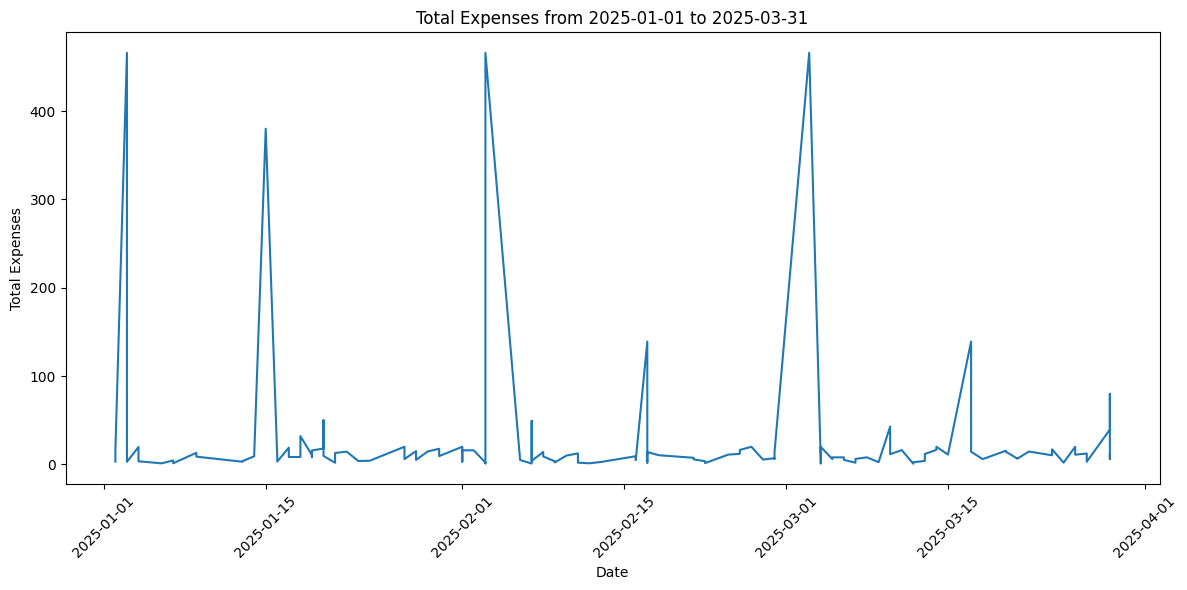

In [13]:
df_filtered_3_months = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_filtered_3_months['Date'], df_filtered_3_months['Total'])
plt.xlabel('Date')
plt.ylabel('Total Expenses')
plt.title(f'Total Expenses from {start_date} to {end_date}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

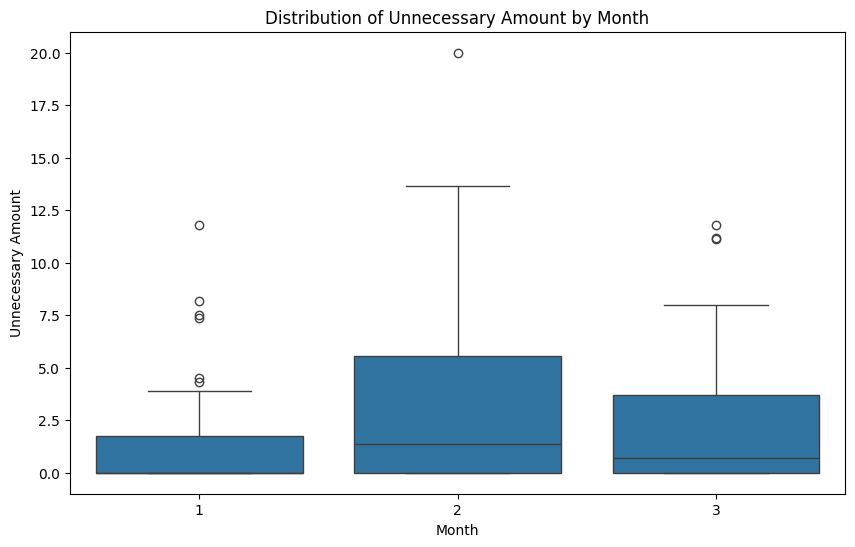

In [14]:
df['Month'] = df['Date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Unnecessary', data=df)
plt.xlabel('Month')
plt.ylabel('Unnecessary Amount')
plt.title('Distribution of Unnecessary Amount by Month')
plt.show()

In [15]:
print(f"Mean Total Expenses: {df_encoded['Total'].mean()}")
print(f"Minimum Total Expenses: {df_encoded['Total'].min()}")
print(f"Maximum Total Expenses: {df_encoded['Total'].max()}")

Mean Total Expenses: 26.45769230769231
Minimum Total Expenses: 0.79
Maximum Total Expenses: 466.0


Based on these two graphs we can get an idea of how total monthly expenditures are. We have also got average, mean and max values. On this information we can proceed to dive deep in the data set and explore other features.

---

### 2.	Now let’s begin with the next question, which categories (Reasons) do I spend the most on?

As per my analysis of the 1st question, we can say that we have got total expanse by “Reason” and three months total expanse.  We have also found that of all transactions 466 is the highest and 0.79 is the lowest. Now that we have got some idea of my monthly total expense, let’s find out which category of “Reason” do I spend most of my money on.

#### MFA (Monthly Fixed Amount)

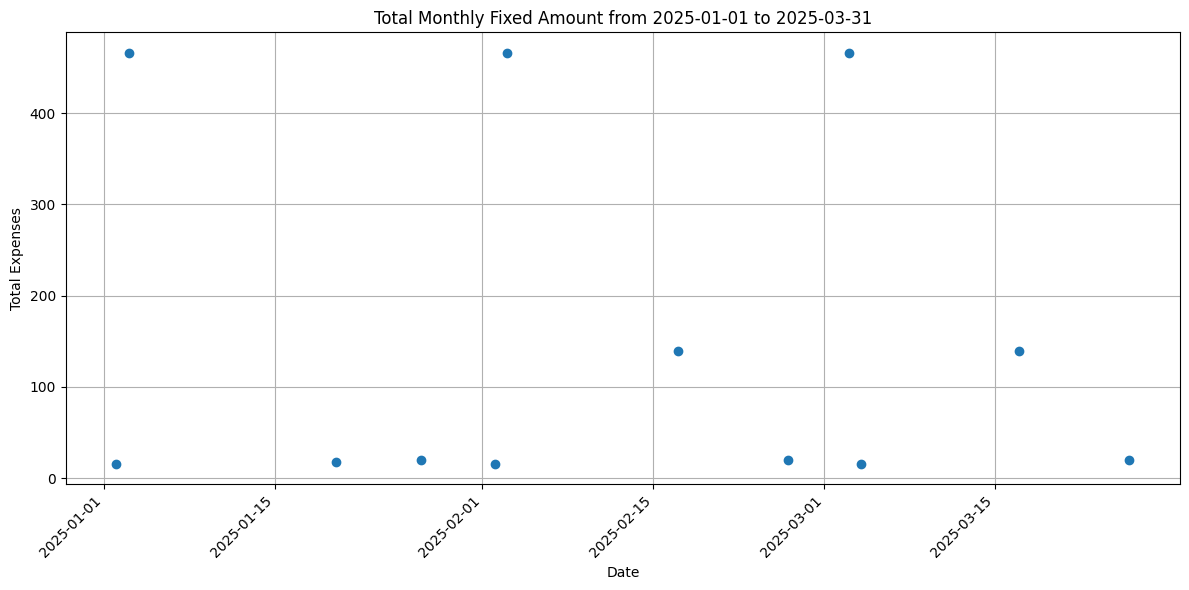

In [16]:
df_mfa_1 = df[df['MFA'] == 1].copy()
df_mfa_1_filtered = df_mfa_1[(df_mfa_1['Date'] >= start_date) & (df_mfa_1['Date'] <= end_date)].copy()

# Using a scatter plot to show the 'Total' for transactions with Monthly fixed amount.
plt.figure(figsize=(12, 6))
plt.scatter(df_mfa_1_filtered['Date'], df_mfa_1_filtered['Total'])
plt.xlabel('Date')
plt.ylabel('Total Expenses')
plt.title(f'Total Monthly Fixed Amount from {start_date} to {end_date}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

In [17]:
df_mfa_1_filtered = df[(df['MFA'] == 1) & (df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()
df_mfa_1_filtered['Month'] = df_mfa_1_filtered['Date'].dt.month
monthly_mfa_total = df_mfa_1_filtered.groupby('Month')['Total'].sum().reset_index()
print("Total MFA per month:")
print(monthly_mfa_total)
print(f"Sum of 'Total' column:", {df_mfa_1['Total'].sum()})

Total MFA per month:
   Month   Total
0      1  519.89
1      2  641.00
2      3  641.00
Sum of 'Total' column: {np.float64(1801.89)}


---

####Unnecessary

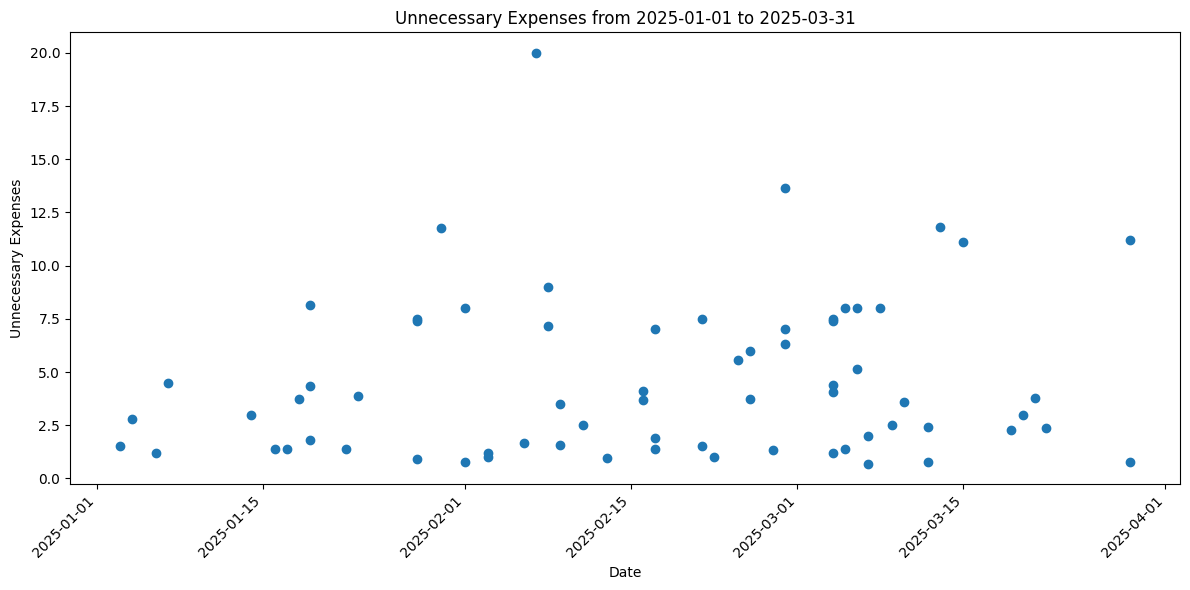

In [18]:
df_Un_1 = df[df['Unnecessary'] != 0].copy()
df_Un_1_filtered = df_Un_1[(df_Un_1['Date'] >= start_date) & (df_Un_1['Date'] <= end_date)].copy()

# Using a scatter plot to show the 'Total' for transactions with Unnecessary over the three months.
plt.figure(figsize=(12, 6))
plt.scatter(df_Un_1_filtered['Date'], df_Un_1_filtered['Unnecessary'])
plt.xlabel('Date')
plt.ylabel('Unnecessary Expenses')
plt.title(f'Unnecessary Expenses from {start_date} to {end_date}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
df_Un_1_filtered = df[(df['Unnecessary'] != 0) & (df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()
df_Un_1_filtered['Month'] = df_Un_1_filtered['Date'].dt.month
monthly_Un_total = df_Un_1_filtered.groupby('Month')['Unnecessary'].sum().reset_index()
Un_total = df_Un_1_filtered['Unnecessary'].sum()
print("Total Unnecessary expenses per month:")
print(monthly_Un_total)
print(f"Sum of 'Unnecessary' column: {Un_total}")

Total Unnecessary expenses per month:
   Month  Unnecessary
0      1        66.56
1      2       129.07
2      3       113.37
Sum of 'Unnecessary' column: 309.0


---

#### MERC (Monthly extra required cost)

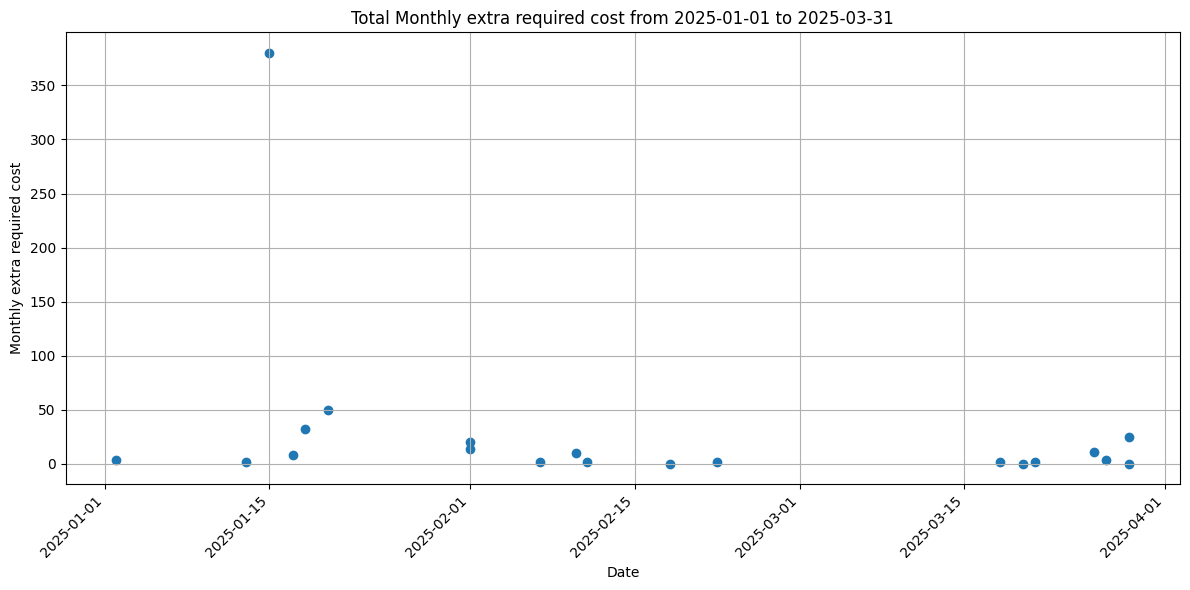

In [20]:
df_merc_1 = df[df['MERC'] == 1].copy()
df_merc_1_filtered = df_merc_1[(df_merc_1['Date'] >= start_date) & (df_merc_1['Date'] <= end_date)].copy()

# Using a scatter plot to show the 'Total' for transactions with Monthly extra required cost.
plt.figure(figsize=(12, 6))
plt.scatter(df_merc_1_filtered['Date'], df_merc_1_filtered['My amount'])
plt.xlabel('Date')
plt.ylabel('Monthly extra required cost')
plt.title(f'Total Monthly extra required cost from {start_date} to {end_date}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

In [21]:
df_merc_1_filtered = df[(df['MERC'] != 0) & (df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()
df_merc_1_filtered['Month'] = df_merc_1_filtered['Date'].dt.month
monthly_merc_total = df_merc_1_filtered.groupby('Month')['My amount'].sum().reset_index()
merc_total = df_merc_1_filtered['My amount'].sum()
print("Total 'Monthly fixed amount' per month:")
print(monthly_merc_total)
print(f"Sum of 'MERC' column: {merc_total}")

Total 'Monthly fixed amount' per month:
   Month  My amount
0      1     475.09
1      2      48.98
2      3      42.00
Sum of 'MERC' column: 566.0699999999999


---

####Grocery

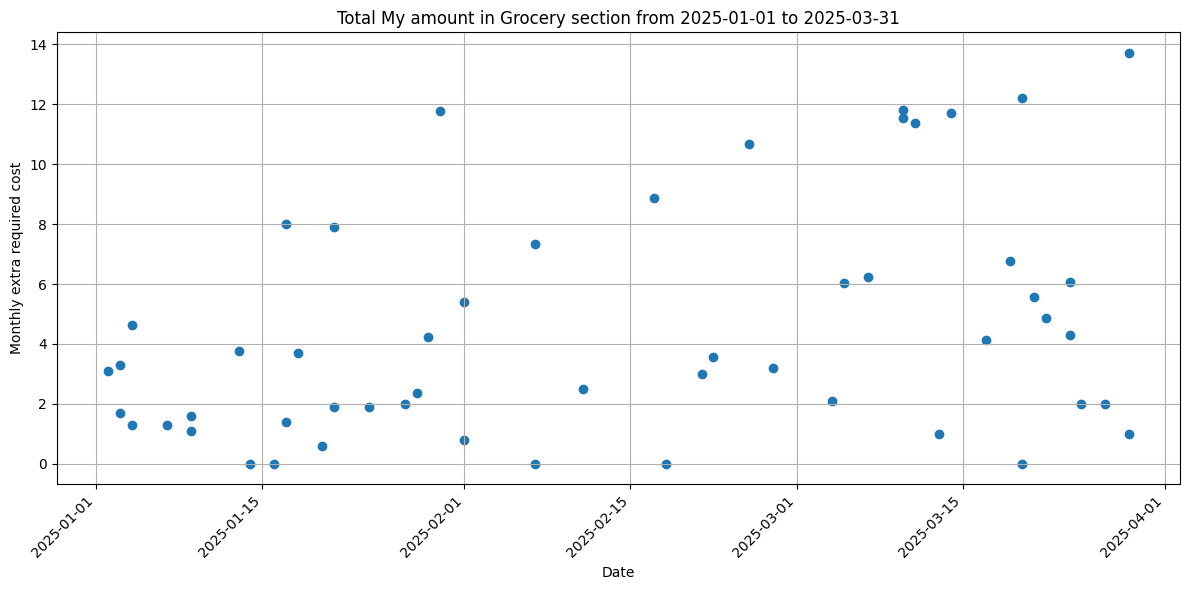

In [22]:
df_g_1 = df[df['Grocery'] == 1].copy()
df_g_1_filtered = df_g_1[(df_g_1['Date'] >= start_date) & (df_g_1['Date'] <= end_date)].copy()

# Using a scatter plot to show the 'Total' for transactions with Grocery.
plt.figure(figsize=(12, 6))
plt.scatter(df_g_1_filtered['Date'], df_g_1_filtered['My amount'])
plt.xlabel('Date')
plt.ylabel('Monthly extra required cost')
plt.title(f'Total My amount in Grocery section from {start_date} to {end_date}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

In [23]:
df_g_1_filtered = df[(df['Grocery'] == 1) & (df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()
df_g_1_filtered['Month'] = df_g_1_filtered['Date'].dt.month
monthly_g_total = df_g_1_filtered.groupby('Month')[['My amount', 'Common']].sum().reset_index()
g_total = df_g_1_filtered[['My amount', 'Common']].sum()
print("Total 'Grocery' per month:")
print(monthly_g_total)
print(f"Sum of 'Grocery' column: {g_total}")

Total 'Grocery' per month:
   Month  My amount  Common
0      1      67.49  103.34
1      2      45.28  101.87
2      3     124.40  102.78
Sum of 'Grocery' column: My amount    237.17
Common       307.99
dtype: float64


---

### 3. Which categories contribute most to unnecessary spending?

To understand this question, we must first look at our entire features. To do this there are different methods but plotting a heat map is the easiest way.

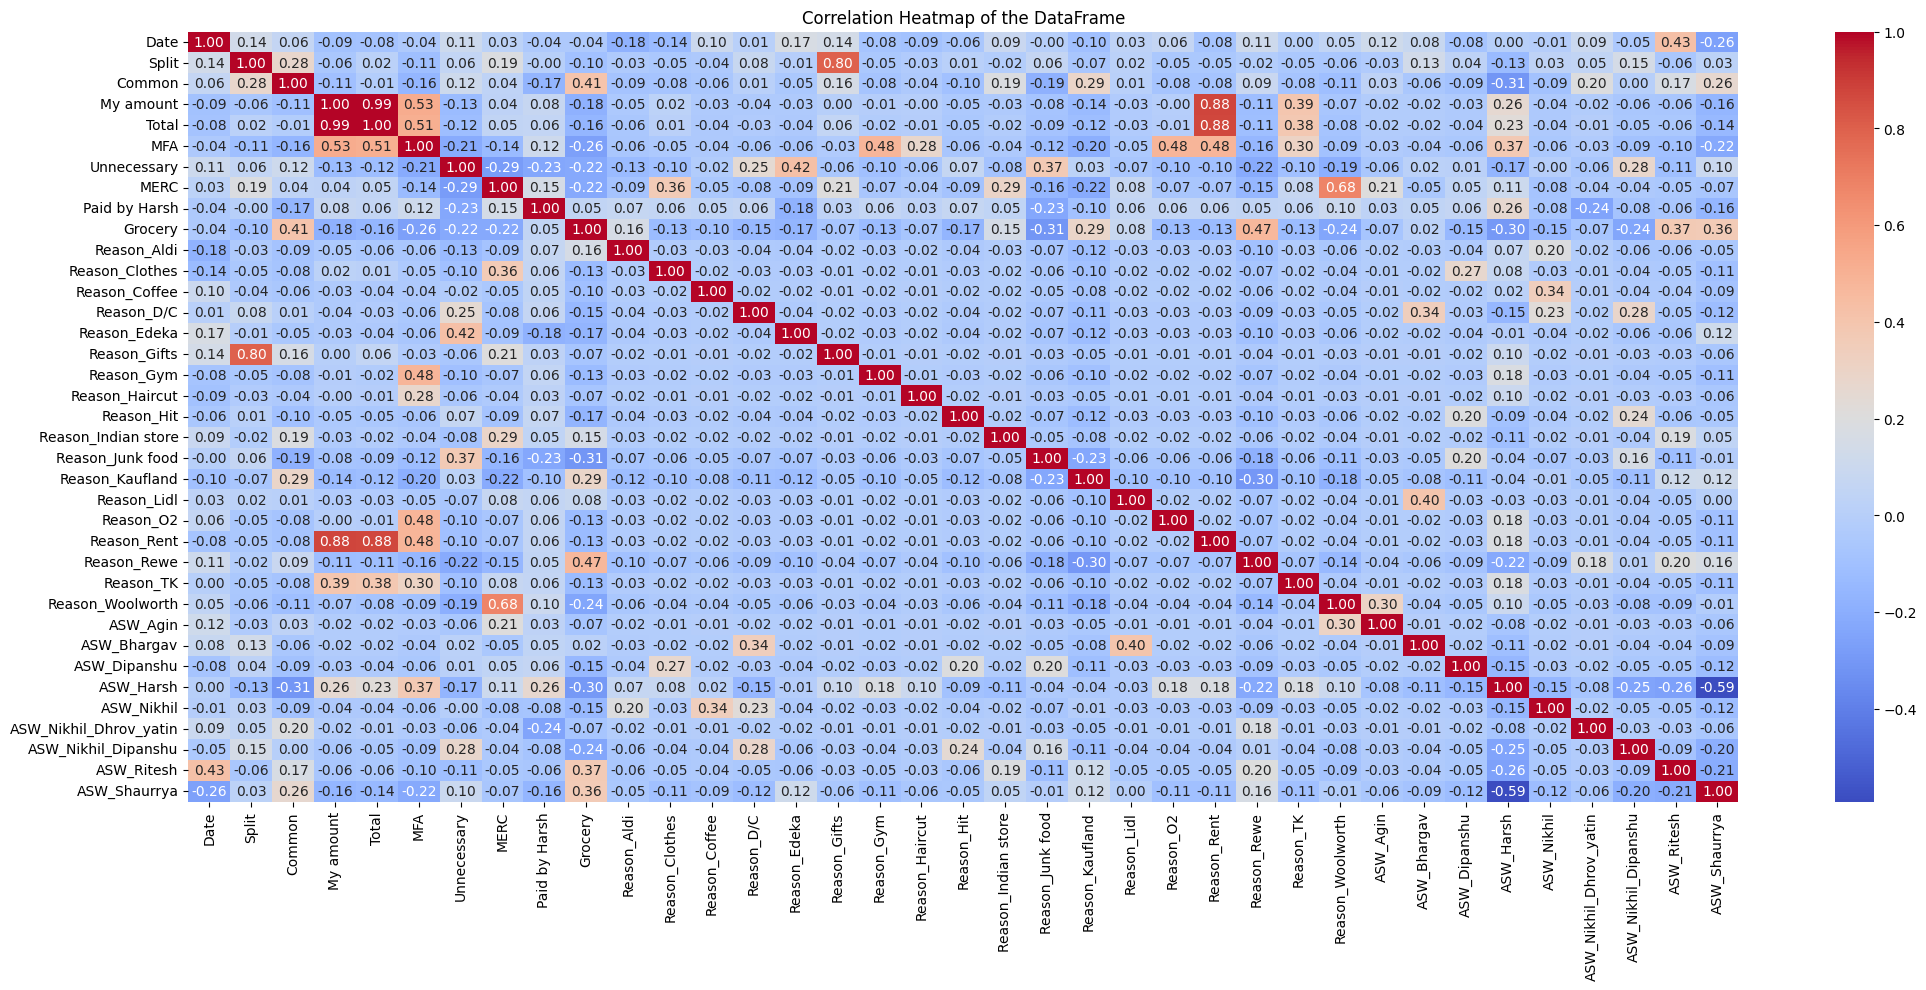

In [24]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of the DataFrame')
plt.show()

From the above heat map, we can see that there are some areas with particularly more heat. Such as the Reason_Rent and My amount and Total have the most heat. While other features such as Reason_woolworth and MERC, Reason_Gifts and split have third and second most heights heat in the map respectively.

With further inspection you can notice that features such as Reason_Gym and MFA, Reason_O2 and Reason_Rent and MFA have some hot spots.

So, I would say that we must check all these sections carefully to get more detailed incites.


####   lets first take a look at the Reason group(All Categorical values of the reason column).



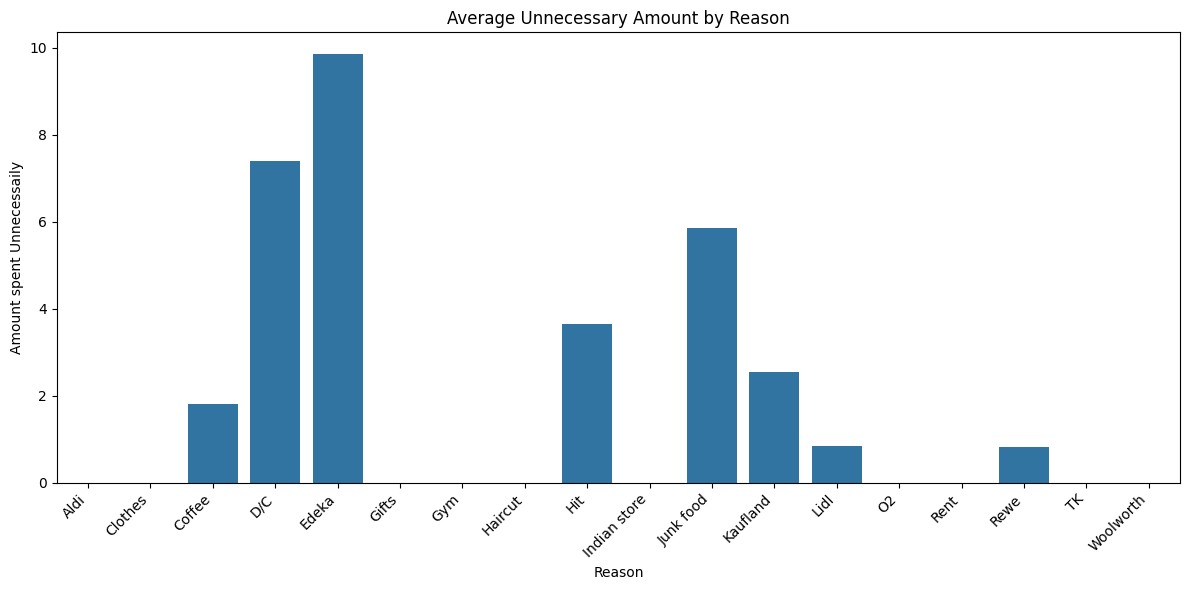

In [25]:
reason_unnecessary_avg = df.groupby('Reason')['Unnecessary'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Reason', y='Unnecessary', data=reason_unnecessary_avg)
plt.xlabel('Reason')
plt.ylabel('Amount spent Unnecessaily')
plt.title('Average Unnecessary Amount by Reason')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

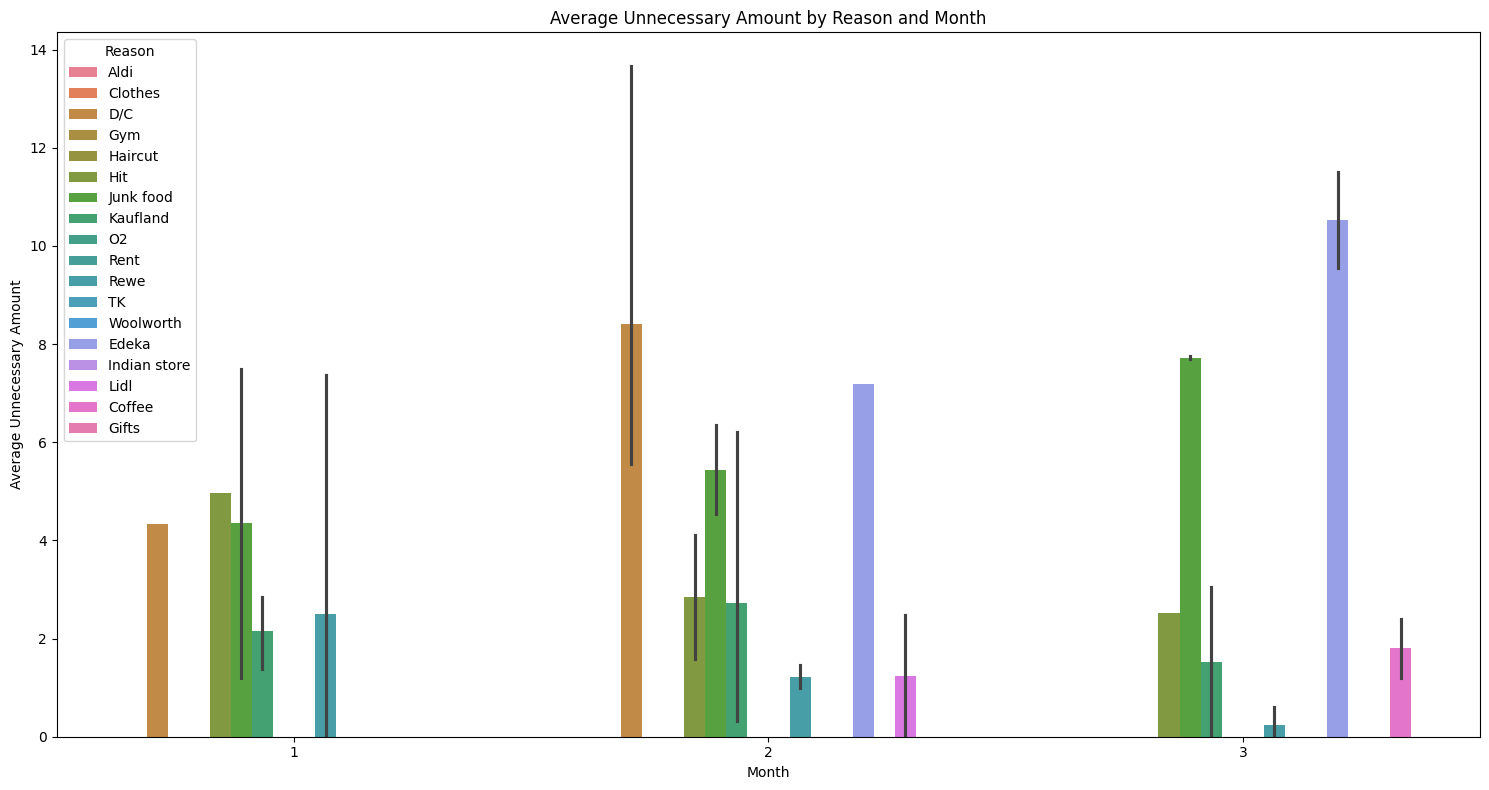

In [26]:
df['Month'] = df['Date'].dt.month
grouped_data = df.groupby(['Month', 'Reason', 'ASW'])['Unnecessary'].mean().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_data, x='Month', y='Unnecessary', hue='Reason', palette='husl')
plt.xlabel('Month')
plt.ylabel('Average Unnecessary Amount')
plt.title('Average Unnecessary Amount by Reason and Month')
plt.tight_layout()
plt.show()

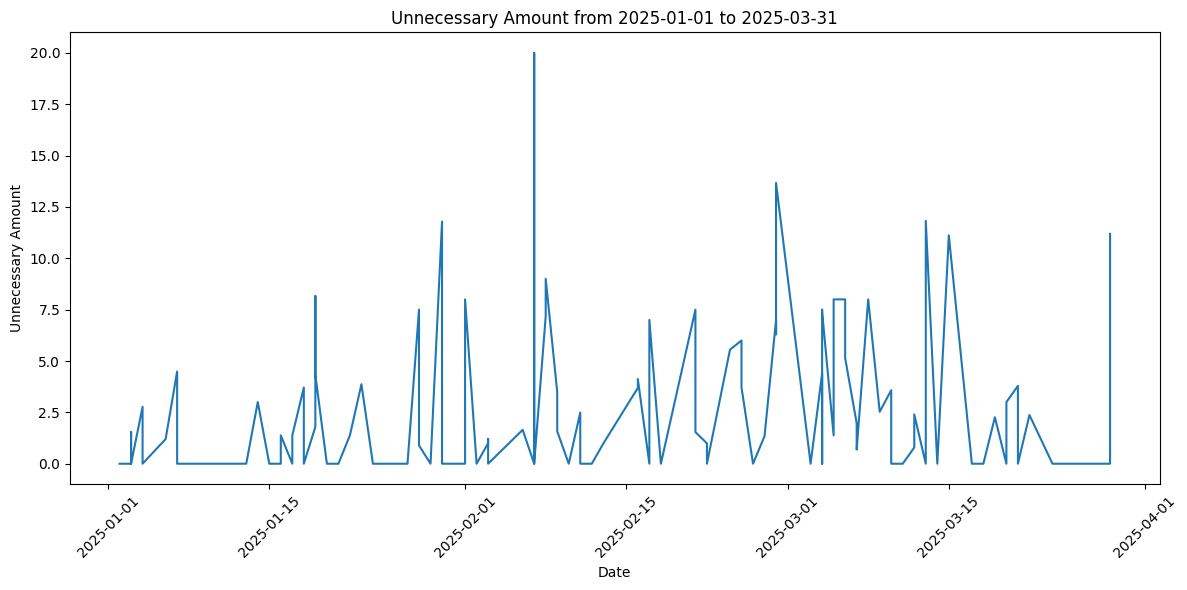

In [27]:
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Date'], df_filtered['Unnecessary'])
plt.xlabel('Date')
plt.ylabel('Unnecessary Amount')
plt.title(f'Unnecessary Amount from {start_date} to {end_date}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Looking at the above three graphs, we can say that Edeka, D\C, junk_food are the top three Unnecessary reasons for spending. Also 2nd month shows sudden incline in the D/C column while Edeka in the 3rd month.

#### *   To further understand my unnecessary spendings, let’s see whom I spent most of with.



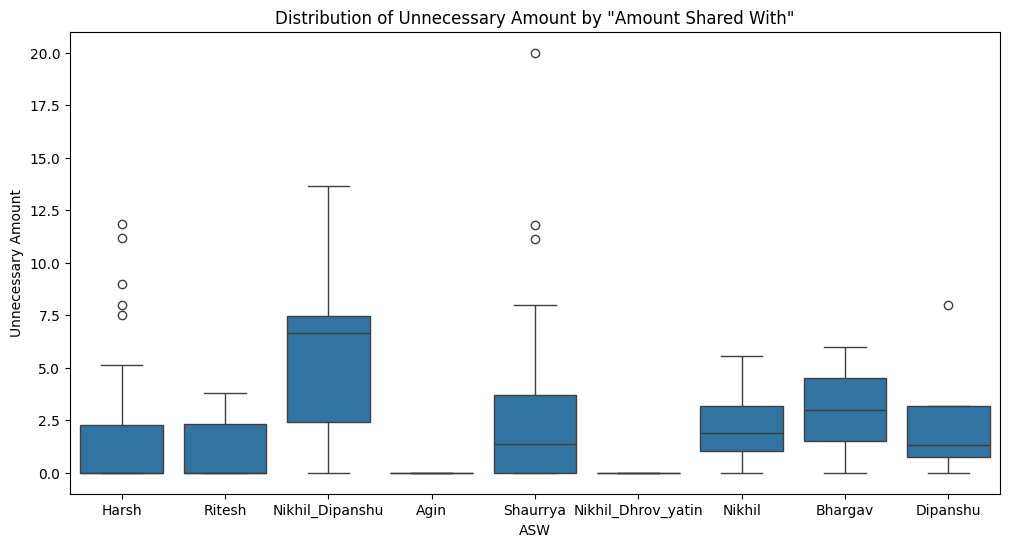

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ASW', y='Unnecessary', data=df)
plt.xlabel('ASW')
plt.ylabel('Unnecessary Amount')
plt.title('Distribution of Unnecessary Amount by "Amount Shared With"')
plt.show()

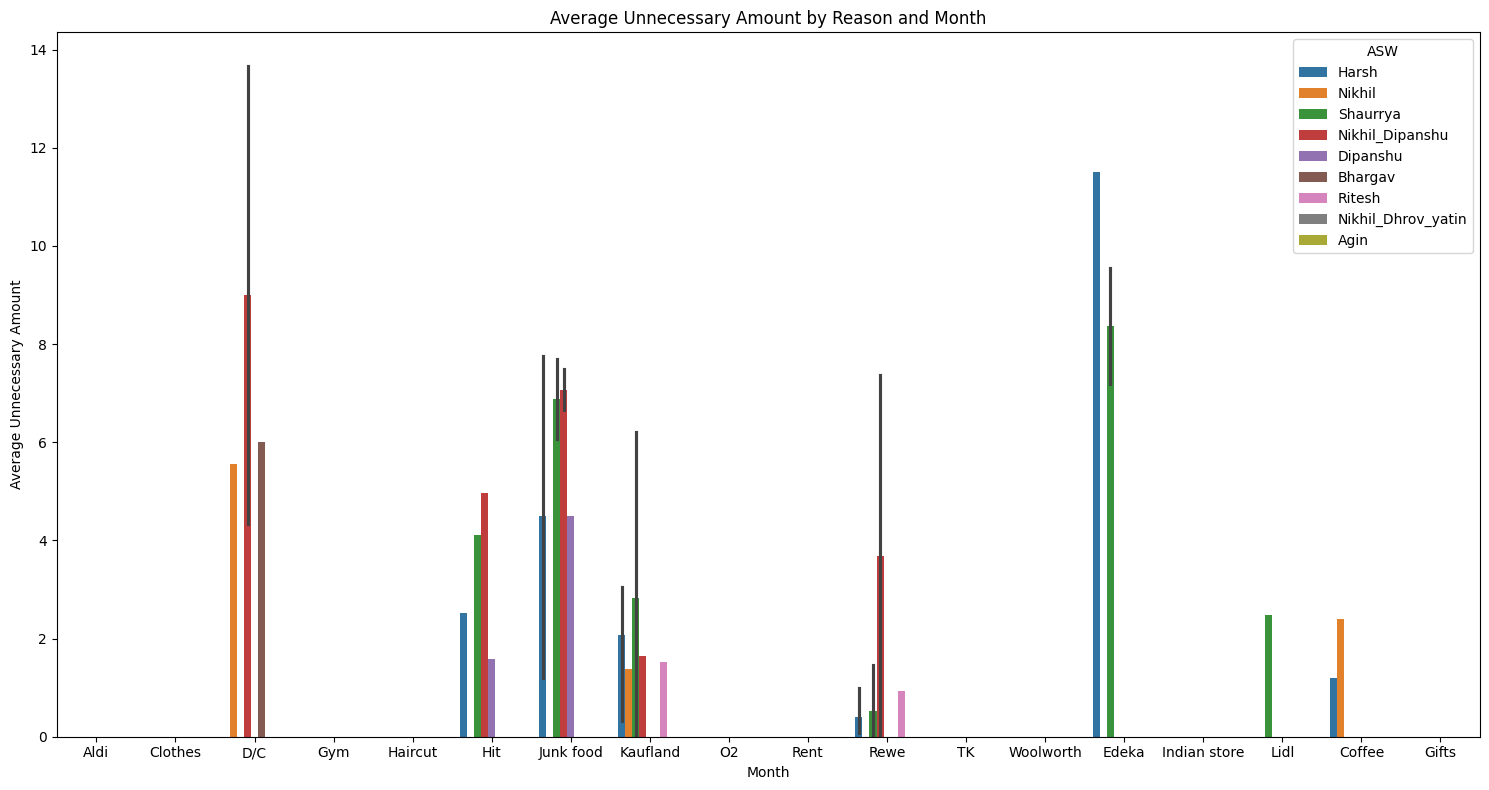

In [29]:
df['Month'] = df['Date'].dt.month
grouped_data = df.groupby(['Month', 'Reason', 'ASW'])['Unnecessary'].mean().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_data, x='Reason', y='Unnecessary', hue='ASW', palette='tab10')
plt.xlabel('Month')
plt.ylabel('Average Unnecessary Amount')
plt.title('Average Unnecessary Amount by Reason and Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

From the above figures, We can notice that there are 4 people Nikhil, Dipanshu, Shaurrya and myself who have spent Heights. Me and Shaurrya have spent more in Edeka and junk food while Me and Nikhil & Dipanshu have spent more in D/C and junk food column.

##**Conclusion**

A time series analysis was conducted to track total expenses over several months. The analysis provided valuable insights into monthly spending habits. Clear spending patterns emerged, highlighting months with significantly higher outflows, helping to pinpoint peak expense periods.

The analysis identified which categories (e.g., Grocery, MFA, Monthly Extra Required Costs) accounted for the largest portions of total spending. This breakdown helped isolate areas where fixed versus variable costs dominate. Unnecessary spending was analyzed across months, revealing trends and inconsistencies in non-essential purchases. A boxplot distribution per month offered insights into variability and outliers in unnecessary costs. An exploration of "whom I spent most with" provided behavioral insights, uncovering if social context influenced unnecessary expenses.

Categories like Grocery, Monthly Fixed Amount, and Extra Monthly Costs should be allocated fixed budgets to reduce overspending.


---